In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

import time
from datetime import timedelta

import pickle

from nltk.corpus import stopwords
from nltk.tokenize import SpaceTokenizer
import re

In [18]:
def elapsed_time(start_time, end_time):
    elapsed_time_secs = end_time - start_time
    return timedelta(seconds=round(elapsed_time_secs))

In [19]:
train_inpath = 'C:/Users/thisi/Workspace/AI_dataset/IMDB/'
test_inpath = 'C:/Users/thisi/Workspace/AI_dataset/IMDB/'
outpath = 'C:/Users/thisi/Workspace/AI_dataset/IMDB/'

filename = train_inpath + 'imdb_stemmed_corpus.sav'
lem_corpus = pickle.load(open(filename, 'rb'))

imdb_train=pd.read_csv(train_inpath + '/imdb_train.csv')

In [20]:
lem_corpus[:5]

['I rent I bit weari 80 nbc program appar I save lot money I noth actor credit good job show flaw premis br br We charact unlik He full flaw enlighten complet jerk good day yet reason anybodi care while creat american sitcom center around complet bullhead jackass revolutionari full potenti met within show most support charact fulli flesh charact rather sad punch bag want empathi audienc punch bag As sitcom one made normal audienc relat negat lead charact extent see bitting harm peopl stay there reason ani normal peopl would simpli left abus keep without real reason even realli unbeliev one given joanna cassidi special 2 part abort episod major problem show fall apart To simpli believ peopl put guy told heart gold mesh realiti situat If anyth even dramedi thi badli plot conceiv execut premis moment overal met fate deserv someon gut go make good idea execut haphazard look like weirdli script version jerri springer show someon abus tyrant suppos root told A show like requir deft touch act

In [21]:
lst_nested_lem_corpus = []
for review in lem_corpus:
    lst_nested_lem_corpus.append([word for word in review.split()])
print(lst_nested_lem_corpus[:5]) 

[['I', 'rent', 'I', 'bit', 'weari', '80', 'nbc', 'program', 'appar', 'I', 'save', 'lot', 'money', 'I', 'noth', 'actor', 'credit', 'good', 'job', 'show', 'flaw', 'premis', 'br', 'br', 'We', 'charact', 'unlik', 'He', 'full', 'flaw', 'enlighten', 'complet', 'jerk', 'good', 'day', 'yet', 'reason', 'anybodi', 'care', 'while', 'creat', 'american', 'sitcom', 'center', 'around', 'complet', 'bullhead', 'jackass', 'revolutionari', 'full', 'potenti', 'met', 'within', 'show', 'most', 'support', 'charact', 'fulli', 'flesh', 'charact', 'rather', 'sad', 'punch', 'bag', 'want', 'empathi', 'audienc', 'punch', 'bag', 'As', 'sitcom', 'one', 'made', 'normal', 'audienc', 'relat', 'negat', 'lead', 'charact', 'extent', 'see', 'bitting', 'harm', 'peopl', 'stay', 'there', 'reason', 'ani', 'normal', 'peopl', 'would', 'simpli', 'left', 'abus', 'keep', 'without', 'real', 'reason', 'even', 'realli', 'unbeliev', 'one', 'given', 'joanna', 'cassidi', 'special', '2', 'part', 'abort', 'episod', 'major', 'problem', 'sho

In [22]:
filename = 'C:/Users/thisi/Workspace/AI_dataset/IMDB/lst_nested_lem_corpus.sav'
pickle.dump(model, open(filename, 'wb'))

In [6]:
import gensim
model = gensim.models.Word2Vec(size=150, window=10, min_count=2, sg=1, workers=10)
model.build_vocab(sentences=lst_nested_lem_corpus)  # prepare the model vocabulary

C:\Users\thisi\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [7]:
#model.wv.vocab

In [8]:
len(model.wv.vocab)

32104

In [9]:
len(lst_nested_lem_corpus)

25000

In [10]:
model.train(sentences=lst_nested_lem_corpus, total_examples=len(lst_nested_lem_corpus), epochs=20)

(61558091, 68426020)

In [11]:
# Save to disk
filename = 'C:/Users/thisi/Workspace/AI_dataset/IMDB/imdb_train_word2vec_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [12]:
vector = model.wv["given"]  
len(vector)

150

In [13]:
wanted_words = []
count = 0
for word in model.wv.vocab:
    if count<150:
        wanted_words.append(word)
        count += 1
    else:
        break
wanted_vocab = dict((k, model.wv.vocab[k]) for k in wanted_words if k in model.wv.vocab)
print(wanted_vocab)

{'I': <gensim.models.keyedvectors.Vocab object at 0x000001244AC3FB00>, 'rent': <gensim.models.keyedvectors.Vocab object at 0x000001245B7C4B70>, 'bit': <gensim.models.keyedvectors.Vocab object at 0x000001245C6881D0>, 'weari': <gensim.models.keyedvectors.Vocab object at 0x000001245C7B9048>, '80': <gensim.models.keyedvectors.Vocab object at 0x000001245C838278>, 'nbc': <gensim.models.keyedvectors.Vocab object at 0x000001245C84FBE0>, 'program': <gensim.models.keyedvectors.Vocab object at 0x000001245C84FC18>, 'appar': <gensim.models.keyedvectors.Vocab object at 0x000001245C84FC50>, 'save': <gensim.models.keyedvectors.Vocab object at 0x000001245C84FC88>, 'lot': <gensim.models.keyedvectors.Vocab object at 0x000001245C84FCC0>, 'money': <gensim.models.keyedvectors.Vocab object at 0x000001245C84FCF8>, 'noth': <gensim.models.keyedvectors.Vocab object at 0x000001245C84FD30>, 'actor': <gensim.models.keyedvectors.Vocab object at 0x000001245C84FD68>, 'credit': <gensim.models.keyedvectors.Vocab object 

In [14]:
from sklearn.manifold import TSNE

In [15]:
X = model.wv[wanted_vocab] 
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
Y = tsne_model.fit_transform(X)

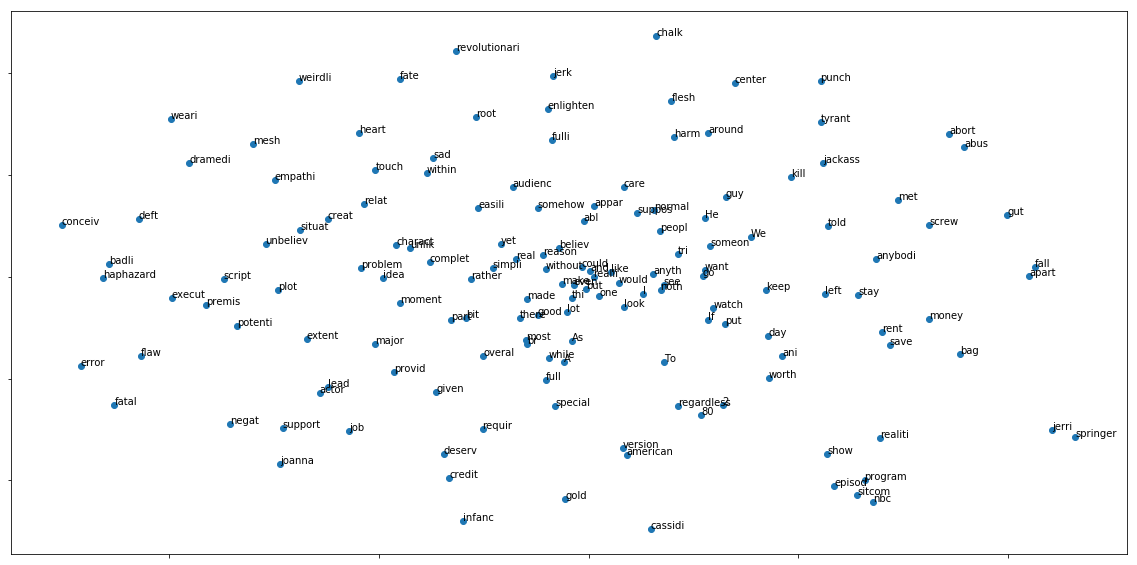

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(Y[:, 0], Y[:, 1])
words = list(wanted_vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(Y[i, 0], Y[i, 1]))
ax.set_yticklabels([]) #Hide ticks
ax.set_xticklabels([]) #Hide ticks
_ = plt.show()